In [58]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

data = pd.read_csv("laptop_data.csv")

data.shape

data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [59]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [60]:
data.drop(columns=['Unnamed: 0'],inplace=True)
## remove gb and kg from Ram and weight and convert the cols to numeric
data['Ram'] = data['Ram'].str.replace("GB", "")
data['Weight'] = data['Weight'].str.replace("kg", "")
data['Ram'] = data['Ram'].astype('int32')
data['Weight'] = data['Weight'].astype('float32')

C:\Users\sudha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


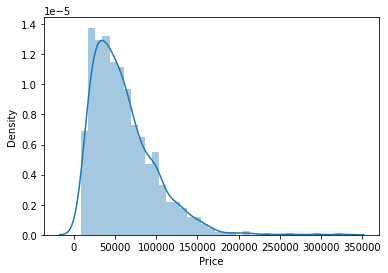

In [61]:
sns.distplot(data['Price'])
plt.show()

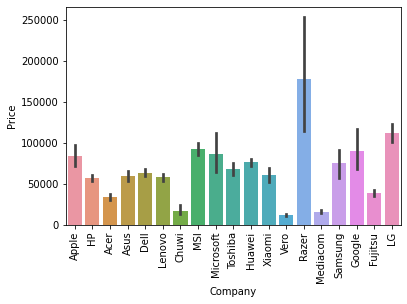

In [62]:
#what is avg price of each brand?

sns.barplot(x=data['Company'], y=data['Price'])

plt.xticks(rotation="vertical")

plt.show()

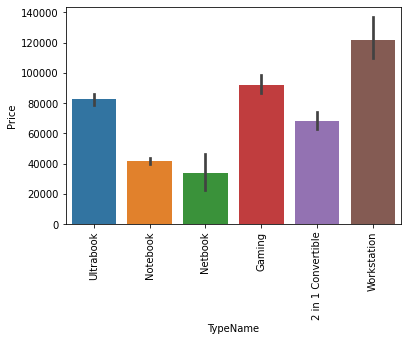

In [63]:
#data['TypeName'].value_counts().plot(kind='bar')
sns.barplot(x=data['TypeName'], y=data['Price'])
plt.xticks(rotation="vertical")
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Price'>

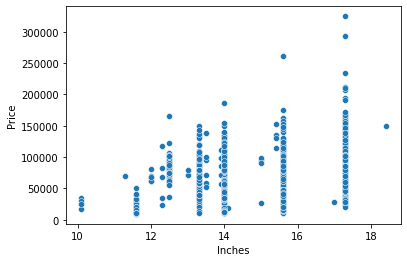

In [64]:
sns.scatterplot(x=data['Inches'],y=data['Price'])

C:\Users\sudha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

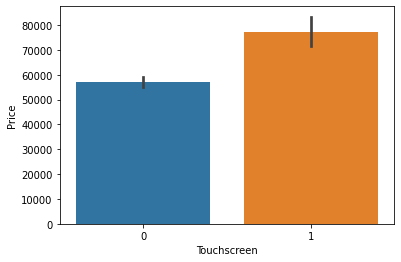

In [65]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
#how many laptops in data are touchscreen
sns.countplot(data['Touchscreen'])
#Plot against price
sns.barplot(x=data['Touchscreen'],y=data['Price'])

<AxesSubplot:xlabel='Ips', ylabel='Price'>

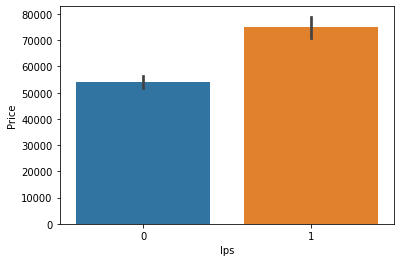

In [66]:
#extract IPS column
data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
sns.barplot(x=data['Ips'],y=data['Price'])

In [67]:
def findXresolution(s):
  return s.split()[-1].split("x")[0]
def findYresolution(s):
  return s.split()[-1].split("x")[1]
#finding the x_res and y_res from screen resolution
data['X_res'] = data['ScreenResolution'].apply(lambda x: findXresolution(x))
data['Y_res'] = data['ScreenResolution'].apply(lambda y: findYresolution(y))
#convert to numeric
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

In [68]:
data['ppi'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')
data.corr()['Price'].sort_values(ascending=False)

Price          1.000000
Ram            0.743007
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Ips            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
Name: Price, dtype: float64

In [69]:
data.drop(columns = ['ScreenResolution', 'Inches','X_res','Y_res'], inplace=True)

In [70]:
#first we will extract Name of CPU which is first 3 words from Cpu column and then we will check which processor it is
def fetch_processor(x):
  cpu_name = " ".join(x.split()[0:3])
  if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
    return cpu_name
  elif cpu_name.split()[0] == 'Intel':
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'
data['Cpu_brand'] = data['Cpu'].apply(lambda x: fetch_processor(x))

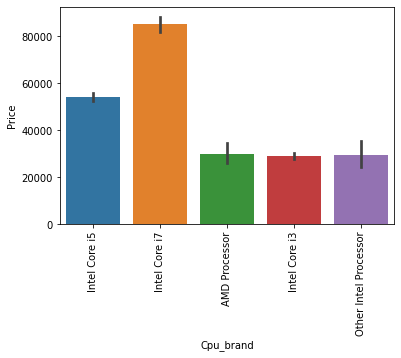

In [71]:
sns.barplot(x=data['Cpu_brand'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\sudha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


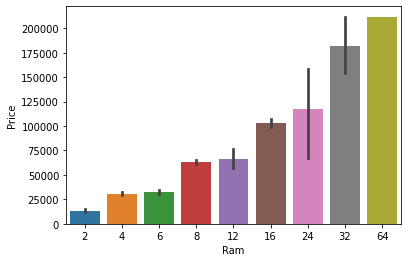

In [72]:
sns.barplot(data['Ram'], data['Price'])
plt.show()

In [73]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')
new = data["Memory"].str.split("+", n = 1, expand = True)

data["first"]= new[0]
data["first"]=data["first"].str.strip()

data["second"]= new[1]

data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['first'] = data['first'].str.replace(r'\D', '')

data["second"].fillna("0", inplace = True)

data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['second'] = data['second'].str.replace(r'\D', '')

data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)

data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])

data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\sudha\AppData\Local\Temp/ipykernel_5236/2300112342.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  data['first'] = data['first'].str.replace(r'\D', '')
C:\Users\sudha\AppData\Local\Temp/ipykernel_5236/2300112342.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  data['second'] = data['second'].str.replace(r'\D', '')


In [74]:
data.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
1018,Toshiba,Notebook,Intel Core i5 6200U 2.3GHz,8,256 SSD,Intel HD Graphics 520,Windows 10,1.47,79387.20,0,1,157.350512,Intel Core i5,0,256,0,0
345,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256 SSD + 2000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.40,60153.12,0,1,141.211998,Intel Core i7,2000,256,0,0
1095,Acer,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD + 1000 HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,42570.72,0,0,141.211998,Intel Core i5,1000,256,0,0
682,Dell,Gaming,Intel Core i5 7300HQ 2.5GHz,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,3.21,109277.28,0,0,141.211998,Intel Core i5,1000,128,0,0
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1,1,276.053530,Intel Core i7,0,512,0,0


In [75]:
data.drop(columns=['Hybrid','Flash_Storage','Memory','Cpu'],inplace=True)

In [76]:
# Which brand GPU is in laptop
data['Gpu_brand'] = data['Gpu'].apply(lambda x:x.split()[0])
#there is only 1 row of ARM GPU so remove it
data = data[data['Gpu_brand'] != 'ARM']
data.drop(columns=['Gpu'],inplace=True)

In [77]:
#Get which OP sys
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
data['os'] = data['OpSys'].apply(cat_os)
data.drop(columns=['OpSys'],inplace=True)

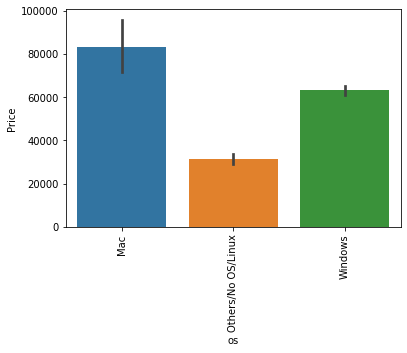

In [78]:
sns.barplot(x=data['os'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\sudha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


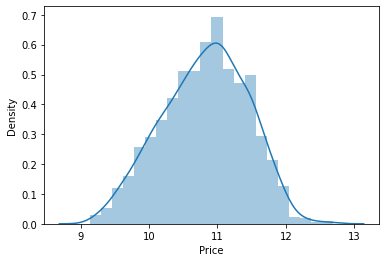

In [79]:
sns.distplot(np.log(data['Price']))
plt.show()

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [81]:
X = data.drop(columns=['Price'])

y = np.log(data['Price'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [82]:
step1 = ColumnTransformer(transformers=[

('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])

],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,

random_state=3,

max_samples=0.5,

max_features=0.75,

max_depth=15)

pipe = Pipeline([

('step1',step1),

('step2',step2)

])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8873402378382488
MAE 0.15860130110457718


In [83]:
import pickle
data.to_csv("df.csv", index=False)
pickle.dump(pipe,open('pipe.pkl','wb'))